In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
dfx=pd.read_csv("Logistic_X_Train.csv")
dfy=pd.read_csv("Logistic_Y_Train.csv")

In [4]:
x=dfx.values
x.shape
y=dfy.values
y=y.reshape((3000,))
y.shape

(3000,)

In [5]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [6]:
def error(y,x,w,b):
    m=x.shape[0]
    error=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        error+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return -error/m
    

In [7]:

def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [8]:
loss = []
acc = []

W = 2*np.random.random((x.shape[1],))
b = 5*np.random.random()

In [21]:
for i in range(3000):
    l,W,b = grad_descent(x,y,W,b,learning_rate=0.1)
    
    loss.append(l)

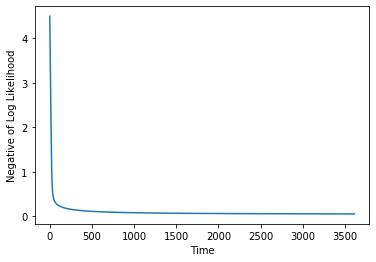

In [22]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [23]:
f=pd.read_csv("Logistic_X_Test.csv")

In [24]:
f=f.values

In [18]:
a=[]
for i in range(f.shape[0]):
    h=predict(f[i],W,b)
    a.append(h)

In [19]:
a

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


In [20]:
for i in range(f.shape[0]):
    print(a[i])

1
1
0
1
1
1
0
1
0
0
0
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
0
0
1
0
1
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
1
0
0
0
1
1
1
0
1
0
0
0
1
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
